# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
    
#### New Libraries to intsall:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`
- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow=1.15`
    - Also install `pip3 install tensorflow-hub`
- [Keras](https://keras.io/)
    - Install via `pip3 install keras`
    
                                                                                            
                                                                                           

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


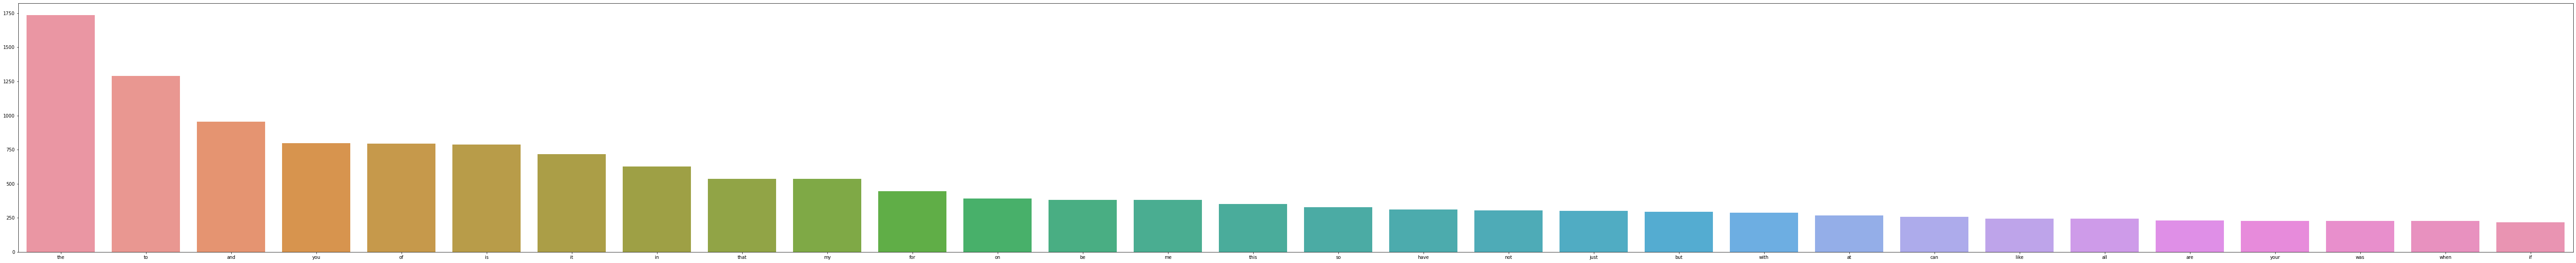

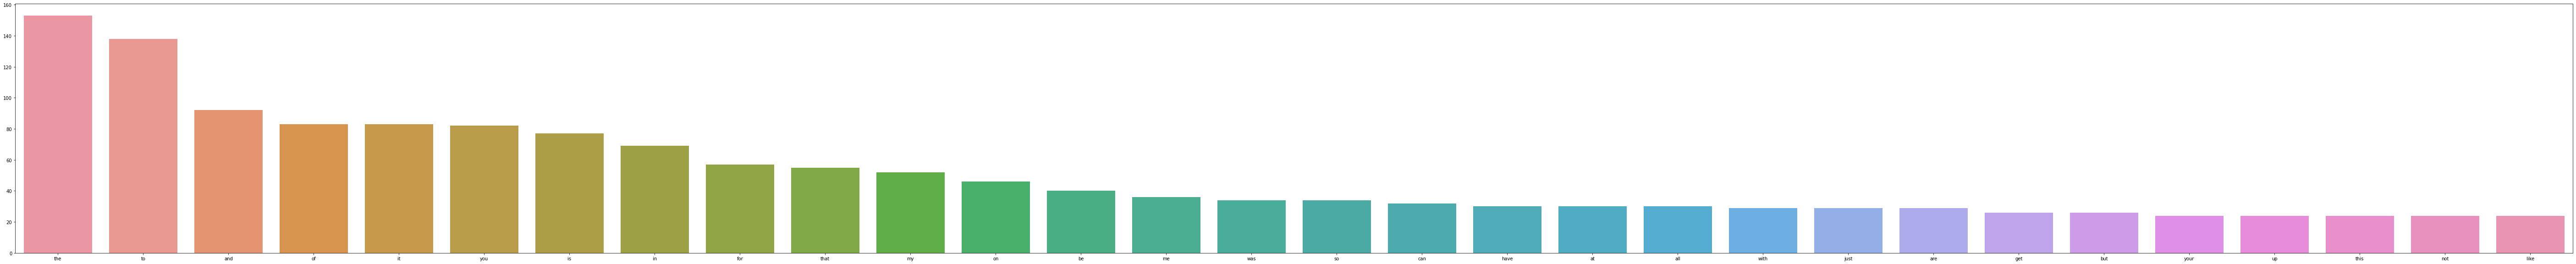

In [7]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

count_vect_train = CountVectorizer()
X_counts_train = count_vect_train.fit_transform(train_df.text)
term_frequencies_train = np.asarray(X_counts_train.sum(axis=0))[0]

x_1_train = [x for _,x in sorted(zip(list(term_frequencies_train[0:]),count_vect_train.get_feature_names()[0:]),reverse=True)]
y_1_train = [_ for _,x in sorted(zip(list(term_frequencies_train[0:]),count_vect_train.get_feature_names()[0:]),reverse=True)]
x_1_train = x_1_train[:30]
y_1_train = y_1_train[:30]
plt.subplots(figsize=(100, 10))
g_train = sns.barplot(x=x_1_train, 
            y=y_1_train)
g_train.set_xticklabels(x_1_train, rotation = 0);

count_vect_test = CountVectorizer()
X_counts_test = count_vect_test.fit_transform(test_df.text)
term_frequencies_test = np.asarray(X_counts_test.sum(axis=0))[0]

x_1_test = [x for _,x in sorted(zip(list(term_frequencies_test[0:]),count_vect_test.get_feature_names()[0:]),reverse=True)]
y_1_test = [_ for _,x in sorted(zip(list(term_frequencies_test[0:]),count_vect_test.get_feature_names()[0:]),reverse=True)]
x_1_test = x_1_test[:30]
y_1_test = y_1_test[:30]
plt.subplots(figsize=(100, 10))
g_test = sns.barplot(x=x_1_test, 
            y=y_1_test)
g_test.set_xticklabels(x_1_test, rotation = 0);



---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [8]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [9]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [10]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

In [11]:
train_df.groupby(['emotion']).count()

,id,text,intensity
emotion,,,
anger,857,857,857
fear,1147,1147,1147
joy,823,823,823
sadness,786,786,786


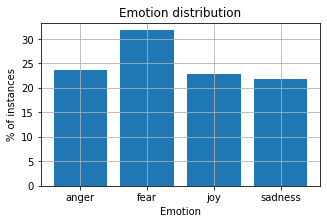

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [15]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [16]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [17]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [18]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [20]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [21]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [22]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [23]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

In [25]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [26]:
# Answer here
# TF-IDF的部分
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_2 = TfidfVectorizer(min_df=1, max_features=1000, tokenizer=nltk.word_tokenize)
X_TD_IDF = vectorizer_2.fit_transform(train_df['text'])
vectorizer_2.get_feature_names()[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

In [27]:
X_TD_IDF.shape

(3613, 1000)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [29]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'fear', 'joy', 'fear', 'fear', 'anger', 'joy',
       'fear', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [30]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [31]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.67      0.70      0.69        84
        fear       0.67      0.65      0.66       110
         joy       0.65      0.65      0.65        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [32]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 12 10  3]
 [15 72 10 13]
 [ 6 13 51  9]
 [ 8 10  8 48]]


In [33]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

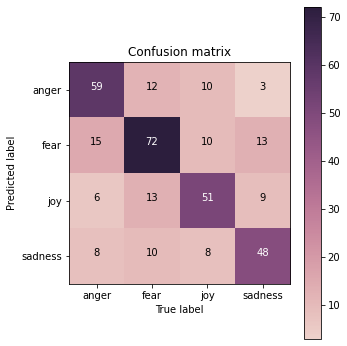

In [34]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [35]:
# Answer here
# 可以看出真正的label對應上預測的label，此外由這張圖可以算出各個不同class的precision rate和recall rate，看出一些潛在的含意
# 由這張圖我發現(anger,sadness)、(anger,joy)比較不會預測錯誤，想想也合理，情緒差異比較大
# 但是(fear,anger)、(fear,sadness)這兩個組合就會比較容易搞混

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [36]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
Predict_answer_train = mnb.predict(X_train)
Predict_answer_test = mnb.predict(X_test)

# 這裡印出對trainning set和testing set的預測結果
print(Predict_answer_train)
print(Predict_answer_test)

['joy' 'fear' 'fear' ... 'anger' 'joy' 'anger']
['joy' 'joy' 'fear' 'joy' 'fear' 'sadness' 'anger' 'fear' 'fear' 'joy'
 'sadness' 'fear' 'sadness' 'joy' 'fear' 'anger' 'fear' 'joy' 'anger'
 'fear' 'anger' 'joy' 'joy' 'sadness' 'joy' 'fear' 'fear' 'joy' 'anger'
 'sadness' 'sadness' 'fear' 'sadness' 'fear' 'joy' 'fear' 'fear' 'anger'
 'sadness' 'sadness' 'sadness' 'fear' 'joy' 'sadness' 'anger' 'joy' 'fear'
 'anger' 'fear' 'fear' 'anger' 'sadness' 'sadness' 'anger' 'fear' 'joy'
 'fear' 'joy' 'anger' 'fear' 'anger' 'fear' 'fear' 'sadness' 'fear' 'fear'
 'fear' 'anger' 'fear' 'joy' 'fear' 'sadness' 'anger' 'joy' 'anger' 'joy'
 'anger' 'fear' 'anger' 'sadness' 'joy' 'sadness' 'fear' 'anger' 'joy'
 'fear' 'anger' 'fear' 'fear' 'anger' 'anger' 'anger' 'fear' 'joy' 'anger'
 'anger' 'joy' 'sadness' 'fear' 'anger' 'joy' 'joy' 'sadness' 'anger'
 'anger' 'fear' 'fear' 'fear' 'fear' 'sadness' 'sadness' 'sadness' 'joy'
 'fear' 'fear' 'anger' 'anger' 'anger' 'anger' 'anger' 'sadness' 'joy'
 'joy' 'sa

In [37]:
acc_train = accuracy_score(y_true=y_train, y_pred=Predict_answer_train)
acc_test = accuracy_score(y_true=y_test, y_pred=Predict_answer_test)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.69


In [38]:
# 這是naive-based方法的classification_report
print(classification_report(y_true=y_test, y_pred=Predict_answer_test))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [39]:
# Answer here
# 可以看出 Decision Tree的 Training accuracy和 testing accuracy分別是0.99和0.66
# 而 Naive Bayes的 Training accuracy和 testing accuracy分別是0.79和0.69，由此可以
# 看出Decision Tree最大的問題就是overfitting，至於原因可能是Decision Tree Model太過
# 於簡單，優點是比較容易理解
# 至於Naive Bayes是用underlying probabilistic model (Bayes theorem)做假設
# 有以下優點:(1)很好實作(2)不需要太多的training data(3)在大部分情況下有不錯的結果
# 而缺點是:(1)他假設class conditional independence，所以會造成accuracy的下降
# (2)如果label的某個數性值沒出現，他的frequency-based的機率會被預測成0

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [40]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [41]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 337       anger
3041    sadness
1984       fear
3592    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [42]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [43]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

### 6.4 Train

In [44]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 65us/step - loss: 1.3355 - accuracy: 0.3648 - val_loss: 1.2905 - val_accuracy: 0.4063
Epoch 2/25
3613/3613 [==============================] - 0s 36us/step - loss: 1.0196 - accuracy: 0.6302 - val_loss: 0.9543 - val_accuracy: 0.6455
Epoch 3/25
3613/3613 [==============================] - 0s 36us/step - loss: 0.6096 - accuracy: 0.7872 - val_loss: 0.8152 - val_accuracy: 0.7003
Epoch 4/25
3613/3613 [==============================] - 0s 36us/step - loss: 0.4348 - accuracy: 0.8422 - val_loss: 0.7947 - val_accuracy: 0.6859
Epoch 5/25
3613/3613 [==============================] - 0s 35us/step - loss: 0.3484 - accuracy: 0.8760 - val_loss: 0.8045 - val_accuracy: 0.6888
Epoch 6/25
3613/3613 [==============================] - 0s 36us/step - loss: 0.2803 - accuracy: 0.9023 - val_loss: 0.8844 - val_accuracy: 0.6945
Epoch 7/25
3613/3613 [==============================] - 0s 35us/step - loss: 0.239

### 6.5 Predict on testing data

In [45]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[1.1198865e-01, 3.6735449e-02, 8.3072454e-01, 2.0551410e-02],
       [5.2504874e-05, 1.0178370e-05, 9.9712616e-01, 2.8111732e-03],
       [1.6370216e-04, 9.9981183e-01, 1.8376570e-06, 2.2739792e-05],
       [1.0198210e-04, 2.7769616e-07, 9.9989760e-01, 1.1810960e-07],
       [1.7199882e-05, 9.9958402e-01, 3.8567407e-08, 3.9880877e-04]],
      dtype=float32)

In [46]:
pred_result.shape

(347, 4)

In [47]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'joy', 'fear', 'joy', 'fear'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [49]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.364794,1.335546,0.406340,1.290531
1,1,0.630224,1.019603,0.645533,0.954256
2,2,0.787157,0.609573,0.700288,0.815250
3,3,0.842236,0.434772,0.685879,0.794701
4,4,0.876003,0.348352,0.688761,0.804457
5,5,0.902297,0.280262,0.694524,0.884442
6,6,0.918904,0.239139,0.674352,0.914850
7,7,0.935511,0.199760,0.662824,0.989202
8,8,0.947135,0.173114,0.671470,1.031012
9,9,0.952948,0.151100,0.685879,1.067278


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

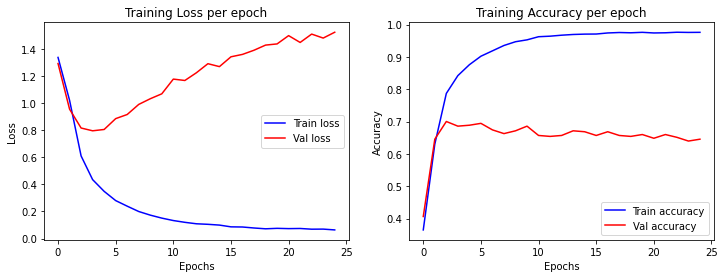

In [50]:
# Answer here
# 以下是產生Train loss 和 Val loss的圖
loss_train = history.history['loss'] 
loss_val = history.history['val_loss'] 
epochs = range(0,25) 
# 設定圖的長寬
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(epochs, loss_train, 'b', label='Train loss') 
plt.plot(epochs, loss_val, 'r', label='Val loss') 
plt.title('Training Loss per epoch') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

# 以下是產生Train accuracy 和 Val accuracy的圖
acc_train = history.history['accuracy'] 
acc_val = history.history['val_accuracy'] 
epochs = range(0,25) 
plt.subplot(122)
plt.plot(epochs, acc_train, 'b', label='Train accuracy') 
plt.plot(epochs, acc_val, 'r', label='Val accuracy') 
plt.title('Training Accuracy per epoch') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()

In [51]:
# 可以看出隨著訓練的epochs增加train的loss會依值下降且accuracy一直增加，但是val就不一樣了
# val的accuracy會先增加到一定程度後就維持不變，或者是下降，loss的部分也是差不多的概念
# 所以可以看出這是overfitting的結果，只有再起初的五個epochs左右 train的時候有不錯的訓練成果

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [52]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
337,10337,"Actually be arsed with my sister sometimes, sh...","[Actually, be, arsed, with, my, sister, someti..."
3041,40214,@AmyMek this is so absurd I could laugh right ...,"[@, AmyMek, this, is, so, absurd, I, could, la..."
1984,21127,Lets start there,"[Lets, start, there]"
3592,40765,Good morning chirpy #SpringEquinox and your pe...,"[Good, morning, chirpy, #, SpringEquinox, and,..."
2635,30631,"@blackeyed_susie They ain't going away, and I ...","[@, blackeyed_susie, They, ai, n't, going, awa..."


In [53]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Actually', 'be', 'arsed', 'with', 'my', 'sister', 'sometimes', ',', 'she', 'controls', 'the', 'TV', '90', '%', 'of', 'the', 'time', 'and', 'when', 'I', 'watch', 'one', 'thing', 'she', 'gets', 'in', 'a', 'huff', '🙄']),
       list(['@', 'AmyMek', 'this', 'is', 'so', 'absurd', 'I', 'could', 'laugh', 'right', 'now', '(', 'if', 'I', 'also', 'did', "n't", 'feel', 'like', 'crying', 'for', 'the', 'future', 'of', 'our', 'country', ')', '.', '#', 'despair', '#', 'wakeupcall']),
       list(['Lets', 'start', 'there'])], dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [54]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
337,10337,"Actually be arsed with my sister sometimes, sh...","[Actually, be, arsed, with, my, sister, someti..."
3041,40214,@AmyMek this is so absurd I could laugh right ...,"[@, AmyMek, this, is, so, absurd, I, could, la..."
1984,21127,Lets start there,"[Lets, start, there]"
3592,40765,Good morning chirpy #SpringEquinox and your pe...,"[Good, morning, chirpy, #, SpringEquinox, and,..."
2635,30631,"@blackeyed_susie They ain't going away, and I ...","[@, blackeyed_susie, They, ai, n't, going, awa..."


In [55]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [56]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.05417771,  0.41100767,  0.11482027, -0.32140553, -0.06015989,
       -1.2011055 ,  0.93484765, -0.8976199 , -0.52366227,  0.32400638,
       -0.12459997, -0.38118216, -0.5776981 ,  0.13591649, -0.4887971 ,
       -0.22178525,  0.03571855,  0.2673125 ,  0.2664345 , -0.11897829,
        0.90343946,  0.8593483 ,  0.26343277, -0.09425446,  0.23913395,
        0.28054658, -0.7324285 , -1.1006997 , -0.49505854,  0.17191862,
       -0.14673553,  0.05818741, -0.30818033, -0.40196976,  0.21377347,
        0.35035986,  0.01149792,  0.46267003, -0.31759435, -0.2508607 ,
       -0.8289503 , -0.3050458 ,  0.003794  ,  0.41674003, -0.02175742,
       -0.10931277,  0.30298066,  0.4206051 , -0.39226407, -0.01104915,
       -0.12287024, -0.6675521 , -0.19115776,  0.65583974, -0.46056885,
        0.3103057 ,  0.7868802 , -0.03997191, -1.0867822 ,  0.20390564,
       -0.5243369 ,  0.09167863, -0.13957606,  0.7732105 , -0.6863424 ,
        0.0500096 , -0.70002717,  0.43737495, -0.40563765,  0.04

In [57]:
word_vec.shape

(100,)

In [58]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('help', 0.9471051096916199),
 ('^_^', 0.9442681670188904),
 ('blessing', 0.9428476691246033),
 ('memories😊', 0.9422245621681213),
 ('smile', 0.9381628036499023),
 ('November', 0.935526430606842),
 ('kinda', 0.9337337613105774),
 ('1DayAtaTime', 0.9324835538864136),
 ('cry', 0.9293732047080994),
 ('suffer', 0.9290007948875427)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [59]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [60]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [61]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [62]:
# 增加text_tokenized的欄位給testing data
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))
test_df.head()

,id,text,emotion,intensity,text_tokenized
266,30895,@PhilGlutting Hey There Phil Glutting thank yo...,joy,0.646,"[@, PhilGlutting, Hey, There, Phil, Glutting, ..."
207,30836,@Geminiak @LondonNPC you're welcome! #wordgeek...,joy,0.646,"[@, Geminiak, @, LondonNPC, you, 're, welcome,..."
146,21209,That's an awful miss from Rooney.,fear,0.360,"[That, 's, an, awful, miss, from, Rooney, .]"
199,30828,I love my family so much #lucky #grateful #sma...,joy,0.792,"[I, love, my, family, so, much, #, lucky, #, g..."
154,21217,@RyanAbe awe yay thank god I was so worried.,fear,0.500,"[@, RyanAbe, awe, yay, thank, god, I, was, so,..."


In [63]:
# Answer here
# 我的想法是將一個句子出現的所有單字換成word vector加起來後取平均代表一個句子的vector
# 至於找不到的token的部分，我就會直接把他略過，之後除的時候就不要除那個token
# 這裡使用google的word2vec，接著使用Decision Tree來training跟預測
# 預測結果不是很好，我想是因為只有300維的關係，原本有500維，而且把單字的wordvector直接平均當成句子的vector，有可能會忽略一些比較重要的單字
total_train = np.zeros(300 * train_df.shape[0]).reshape(-1,300)
total_test = np.zeros(300 * test_df.shape[0]).reshape(-1,300)

for i in range(train_df.shape[0]):
    a = train_df.loc[i,'text_tokenized']
    cant_find_num = 0
    for j in a:
        try:
            total_train[i] = np.add(total_train[i],w2v_google_model.wv[j])
        except:
            cant_find_num += 1
    total_train[i] /= (len(a)-cant_find_num)

for i in range(test_df.shape[0]):
    a = test_df.loc[i,'text_tokenized']
    cant_find_num = 0
    for j in a:
        try:
            total_test[i] = np.add(total_test[i],w2v_google_model.wv[j])
        except:
            cant_find_num += 1
    total_test[i] /= (len(a)-cant_find_num)

In [64]:
print(total_train.shape)
print(total_test.shape)

(3613, 300)
(347, 300)


In [65]:
X_train = total_train.copy()
y_train = train_df['emotion']

X_test = total_test.copy()
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 300)
y_train.shape:  (3613,)
X_test.shape:  (347, 300)
y_test.shape:  (347,)


In [66]:
## build DecisionTree model
DT_model_sentence = DecisionTreeClassifier(random_state=0)

## training!
DT_model_sentence = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model_sentence.predict(X_train)
y_test_pred = DT_model_sentence.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'anger', 'fear', 'sadness', 'anger', 'fear',
       'sadness', 'anger', 'anger'], dtype=object)

In [67]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.98
testing accuracy: 0.27


### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [68]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [69]:
X

[array([-0.05417771,  0.41100767,  0.11482027, -0.32140553, -0.06015989,
        -1.2011055 ,  0.93484765, -0.8976199 , -0.52366227,  0.32400638,
        -0.12459997, -0.38118216, -0.5776981 ,  0.13591649, -0.4887971 ,
        -0.22178525,  0.03571855,  0.2673125 ,  0.2664345 , -0.11897829,
         0.90343946,  0.8593483 ,  0.26343277, -0.09425446,  0.23913395,
         0.28054658, -0.7324285 , -1.1006997 , -0.49505854,  0.17191862,
        -0.14673553,  0.05818741, -0.30818033, -0.40196976,  0.21377347,
         0.35035986,  0.01149792,  0.46267003, -0.31759435, -0.2508607 ,
        -0.8289503 , -0.3050458 ,  0.003794  ,  0.41674003, -0.02175742,
        -0.10931277,  0.30298066,  0.4206051 , -0.39226407, -0.01104915,
        -0.12287024, -0.6675521 , -0.19115776,  0.65583974, -0.46056885,
         0.3103057 ,  0.7868802 , -0.03997191, -1.0867822 ,  0.20390564,
        -0.5243369 ,  0.09167863, -0.13957606,  0.7732105 , -0.6863424 ,
         0.0500096 , -0.70002717,  0.43737495, -0.4

In [70]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [71]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [72]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [73]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


In [74]:
# 看一下word2vec_model有哪些字
word2vec_model.wv.vocab.keys()

dict_keys(['Actually', 'be', 'arsed', 'with', 'my', 'sister', 'sometimes', ',', 'she', 'controls', 'the', 'TV', '90', '%', 'of', 'time', 'and', 'when', 'I', 'watch', 'one', 'thing', 'gets', 'in', 'a', 'huff', '🙄', '@', 'AmyMek', 'this', 'is', 'so', 'absurd', 'could', 'laugh', 'right', 'now', '(', 'if', 'also', 'did', "n't", 'feel', 'like', 'crying', 'for', 'future', 'our', 'country', ')', '.', '#', 'despair', 'wakeupcall', 'Lets', 'start', 'there', 'Good', 'morning', 'chirpy', 'SpringEquinox', 'your', 'pensive', 'AutumnEquinox', 'A', 'perfect', 'day', 'however', 'it', 'expressed', '🌹🍁🌓☯️', 'theBeautyofBalance', 'blackeyed_susie', 'They', 'ai', 'going', 'away', 'do', 'want', 'to', 'see', 'them', 'hurt', ';', 'changing', 'hearts/minds', 'really', 'only', 'option', 'no', '?', 'optimism', 'ynnsanity', 'Maybe', 'that', "'s", 'why', 'we', "'re", 'asked', 'study', 'hard', 'get', 'job', 'That', 'way', 'would', 'dreadful', 'Just', 'Saturday', 'over', 'but', 'then', 'again', 'good', 'LSAT', 'ner

### 9.1 Plot using t-SNE (2-dimension)

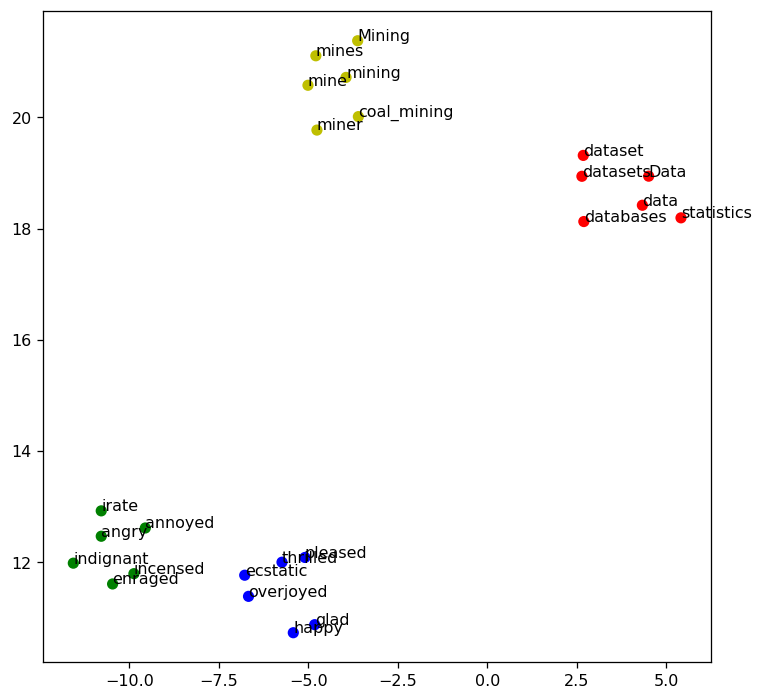

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [76]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy

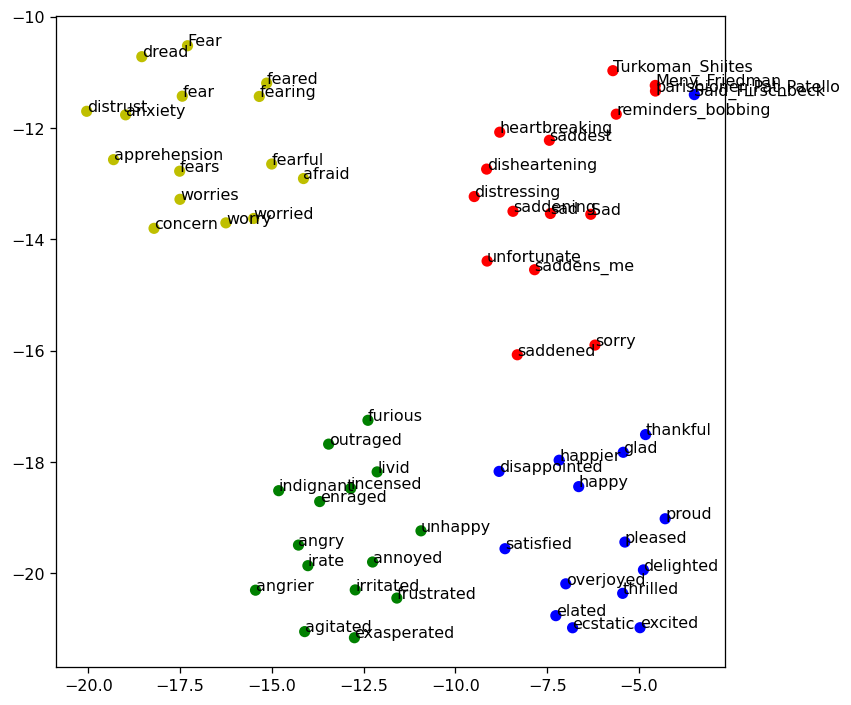

In [77]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---